In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras


In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape,y_train.shape,"**************",x_test.shape,y_test.shape

((60000, 28, 28), (60000,), '**************', (10000, 28, 28), (10000,))

In [ ]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels =[ "T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

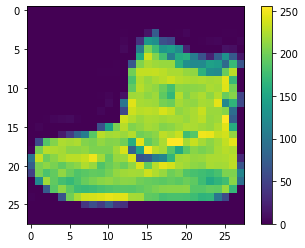

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

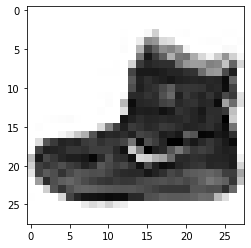

In [ ]:
plt.imshow(x_train[0],cmap="Greys")

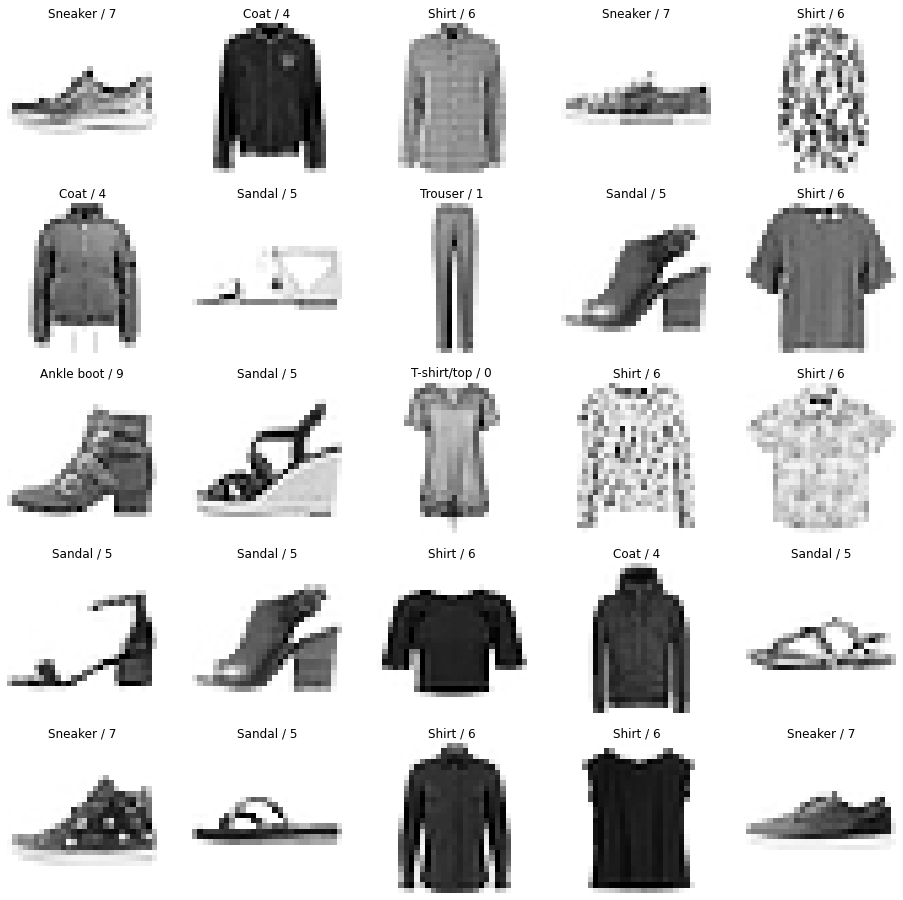

In [ ]:
plt.figure(figsize=(16,16))


j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
x_train.ndim

3

In [ ]:
x_train =np.expand_dims(x_train,-1)


In [ ]:
x_train.ndim

4

In [ ]:
x_test=np.expand_dims(x_test,-1)

In [ ]:
x_train =x_train/255
x_test=x_test/255


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation =train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
model = keras.models.Sequential([
                                          keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu', input_shape=[28,28,1]),
                                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                                          keras.layers.Flatten(),
                                          keras.layers.Dense(units=128,activation='relu'),
                                          keras.layers.Dense(units=10,activation='softmax'),
                                          
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 20s 209ms/step - loss: 0.6224 - accuracy: 0.7881 - val_loss: 0.4263 - val_accuracy: 0.8515
Epoch 2/10
94/94 [==============================] - 20s 212ms/step - loss: 0.3890 - accuracy: 0.8637 - val_loss: 0.3720 - val_accuracy: 0.8683
Epoch 3/10
94/94 [==============================] - 19s 199ms/step - loss: 0.3398 - accuracy: 0.8805 - val_loss: 0.3398 - val_accuracy: 0.8813
Epoch 4/10
94/94 [==============================] - 19s 201ms/step - loss: 0.3072 - accuracy: 0.8920 - val_loss: 0.3210 - val_accuracy: 0.8869
Epoch 5/10
94/94 [==============================] - 19s 199ms/step - loss: 0.2881 - accuracy: 0.8983 - val_loss: 0.3139 - val_accuracy: 0.8884
Epoch 6/10
94/94 [==============================] - 29s 307ms/step - loss: 0.2707 - accuracy: 0.9035 - val_loss: 0.2907 - val_accuracy: 0.8982
Epoch 7/10
94/94 [==============================] - 24s 259ms/step - loss: 0.2546 - accuracy: 0.9098 - val_loss: 0.3108 - val_accuracy: 0.8923

In [ ]:
y_pred=model.predict(x_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.07, 0.02, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2857 - accuracy: 0.8975


[0.2856694161891937, 0.8974999785423279]

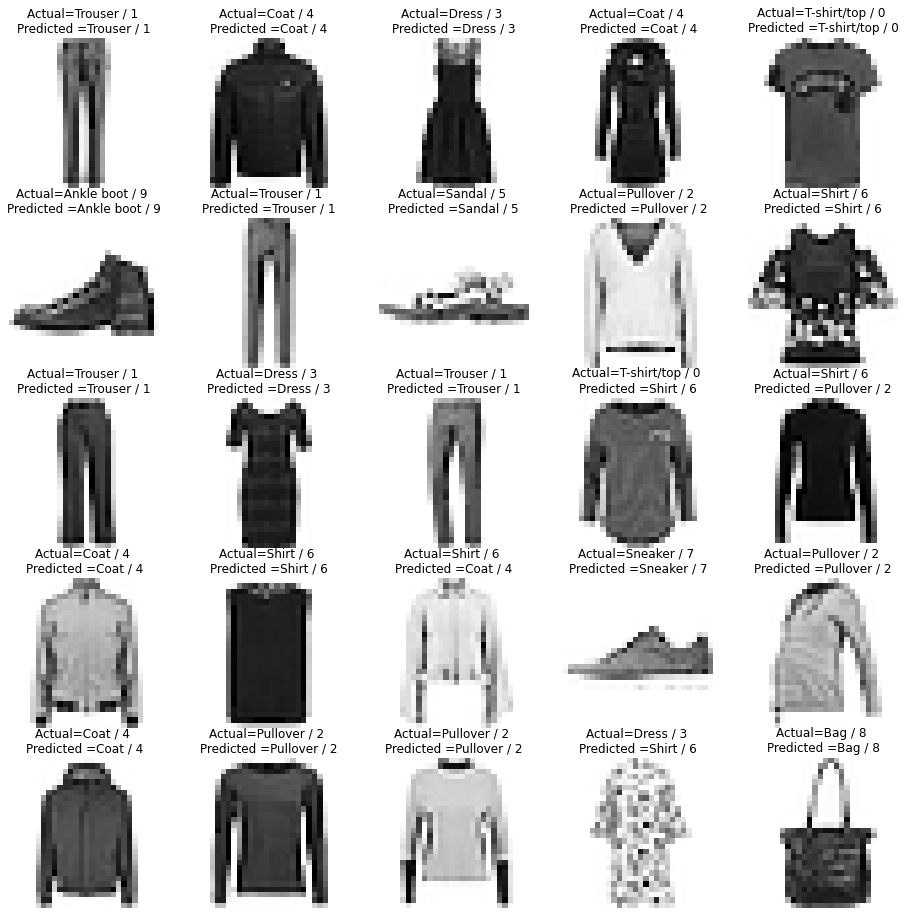

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap="Greys")
  plt.title('Actual={} / {} \nPredicted ={} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
from numpy.core.numeric import count_nonzero
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm =confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.89      0.78      0.83      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.77      0.92      0.84      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.74      0.69      0.71      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



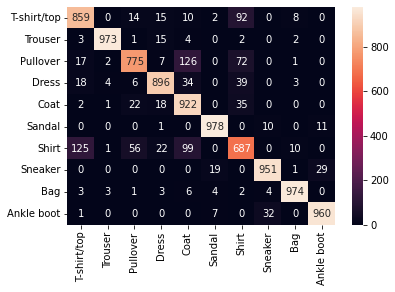

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
model.save("Fashion_cnn_model.h5")

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(x_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(x_validation, y_validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(x_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(x_validation, y_validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(x_test, y_test)

Epoch 1/20
94/94 [==============================] - 25s 263ms/step - loss: 1.0042 - accuracy: 0.6285 - val_loss: 0.5655 - val_accuracy: 0.7786
Epoch 2/20
94/94 [==============================] - 24s 252ms/step - loss: 0.5407 - accuracy: 0.7953 - val_loss: 0.4542 - val_accuracy: 0.8343
Epoch 3/20
94/94 [==============================] - 24s 254ms/step - loss: 0.4584 - accuracy: 0.8304 - val_loss: 0.4056 - val_accuracy: 0.8484
Epoch 4/20
94/94 [==============================] - 24s 257ms/step - loss: 0.4014 - accuracy: 0.8540 - val_loss: 0.3578 - val_accuracy: 0.8648
Epoch 5/20
94/94 [==============================] - 24s 252ms/step - loss: 0.3650 - accuracy: 0.8678 - val_loss: 0.3399 - val_accuracy: 0.8731
Epoch 6/20
94/94 [==============================] - 25s 270ms/step - loss: 0.3410 - accuracy: 0.8751 - val_loss: 0.3272 - val_accuracy: 0.8798
Epoch 7/20
94/94 [==============================] - 24s 253ms/step - loss: 0.3192 - accuracy: 0.8831 - val_loss: 0.3293 - val_accuracy: 0.8742

[0.43000638484954834, 0.909600019454956]